<a href="https://colab.research.google.com/github/Pedrofdorini/Game_automatization1/blob/main/alcool_ofcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
tabela = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OECD Alcohol Consumption per Capita.csv')
display(tabela)

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,LITRES/CAPITA,Flag Codes
0,0,AUS,ALCOHOL,TOT,LT_CAP15,A,1960,9.3,NaN
1,1,AUS,ALCOHOL,TOT,LT_CAP15,A,1961,9.4,NaN
2,2,AUS,ALCOHOL,TOT,LT_CAP15,A,1962,9.5,NaN
3,3,AUS,ALCOHOL,TOT,LT_CAP15,A,1963,9.8,NaN
4,4,AUS,ALCOHOL,TOT,LT_CAP15,A,1964,10.1,NaN
...,...,...,...,...,...,...,...,...,...
2746,2746,ROU,ALCOHOL,TOT,LT_CAP15,A,2015,9.5,NaN
2747,2747,ROU,ALCOHOL,TOT,LT_CAP15,A,2016,9.6,NaN
2748,2748,ROU,ALCOHOL,TOT,LT_CAP15,A,2017,10.1,NaN
2749,2749,ROU,ALCOHOL,TOT,LT_CAP15,A,2018,11.0,NaN


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
colunas_para_excluir = ['index', 'SUBJECT',"MEASURE","FREQUENCY","Flag Codes",]
tabela=tabela.drop(columns=colunas_para_excluir)
display(tabela)

,LOCATION,INDICATOR,TIME,LITRES/CAPITA
0,AUS,ALCOHOL,1960,9.3
1,AUS,ALCOHOL,1961,9.4
2,AUS,ALCOHOL,1962,9.5
3,AUS,ALCOHOL,1963,9.8
4,AUS,ALCOHOL,1964,10.1
...,...,...,...,...
2746,ROU,ALCOHOL,2015,9.5
2747,ROU,ALCOHOL,2016,9.6
2748,ROU,ALCOHOL,2017,10.1
2749,ROU,ALCOHOL,2018,11.0


In [ ]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOCATION       2751 non-null   object 
 1   INDICATOR      2751 non-null   object 
 2   TIME           2751 non-null   int64  
 3   LITRES/CAPITA  2751 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 86.1+ KB


In [ ]:
#verificar se todos os casos são de ocorrencia de alcool
todas_sao_alcohol = (tabela['INDICATOR'] == 'ALCOHOL').all()

# Exibe o resultado
if todas_sao_alcohol:
    print("Todas as linhas da coluna 'INDICATOR' são chamadas de 'ALCOHOL'.")
else:
    print("Algumas linhas da coluna 'INDICATOR' não são chamadas de 'ALCOHOL'.")

Todas as linhas da coluna 'INDICATOR' são chamadas de 'ALCOHOL'.


In [ ]:
tabela.isna().sum()

LOCATION         0
INDICATOR        0
TIME             0
LITRES/CAPITA    0
dtype: int64

In [ ]:
tabela.describe()

,TIME,LITRES/CAPITA
count,2751.000000,2751.000000
mean,1991.840058,8.946892
std,17.196571,4.248435
min,1960.000000,0.000000
25%,1977.000000,6.100000
50%,1993.000000,9.200000
75%,2007.000000,11.600000
max,2022.000000,23.600000


In [ ]:
# Create an interactive grouped bar chart with Plotly Express
fig = px.bar(tabela, x='LOCATION', y='LITRES/CAPITA', color='TIME',
             title='Alcohol Consumption Comparison Across Countries',
             color_continuous_scale='Viridis',
             labels={'LITRES/CAPITA': 'Litres per Capita', 'TIME': 'Year'},
             category_orders={'TIME': sorted(tabela['TIME'].unique())})

fig.update_yaxes(title_text='total alcohol consumption')
# Show the plot
fig.show()

#Quatidade total de alcool consumido em cada pais e a frequência


In [ ]:
soma_litros_per_capita=tabela['LITRES/CAPITA'].sum()
print(f"a quantidade total consumida de alcool em toda a base de dados é`{soma_litros_per_capita}")

soma_litros_per_capita_aus=tabela.groupby("LOCATION")['LITRES/CAPITA'].sum()
print(f"a quantidade total consumida de alcool em todos os paises e regiões é:`{soma_litros_per_capita_aus}")

frequencia = tabela.groupby("LOCATION")["TIME"].value_counts()
print(frequencia)

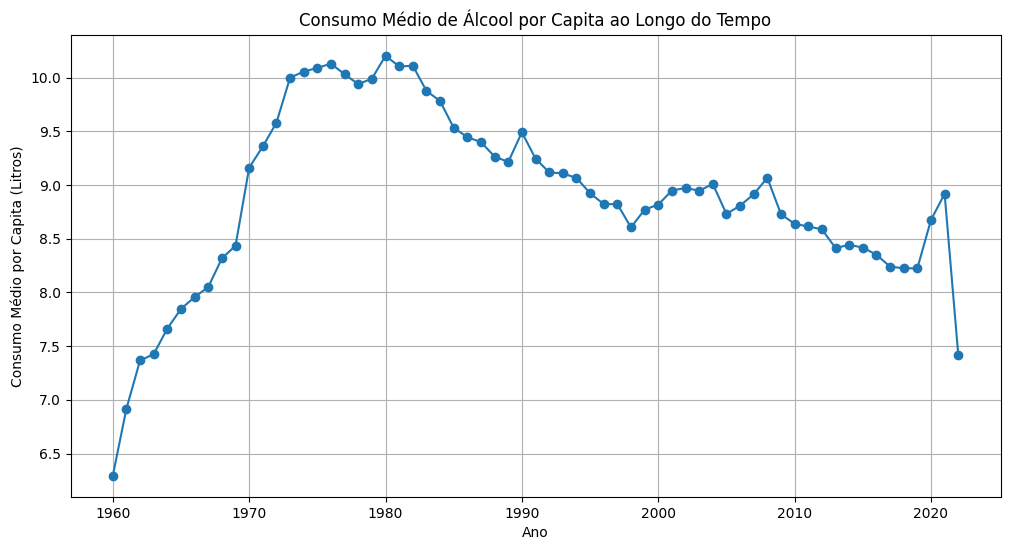

In [ ]:
# Calcular o consumo médio por ano para todas as localizações
consumo_medio_por_ano = tabela.groupby('TIME')['LITRES/CAPITA'].mean()

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(consumo_medio_por_ano, marker='o', linestyle='-')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Consumo Médio por Capita (Litros)')
plt.title('Consumo Médio de Álcool por Capita ao Longo do Tempo')

# Mostrar o gráfico
plt.grid(True)
plt.show()


In [ ]:

# Criar o gráfico de linha interativo com Plotly Express
fig = px.line(tabela, x='TIME', y='LITRES/CAPITA', color='LOCATION',
              title='Consumo Médio de Álcool por Capita ao Longo do Tempo',
              labels={'LITRES/CAPITA': 'Consumo Médio por Capita (Litros)', 'TIME': 'Ano'},
              category_orders={'LOCATION': sorted(tabela['LOCATION'].unique())})

# Mostrar o gráfico
fig.show()

In [7]:
!git status

On branch main

No commits yet

nothing to commit (create/copy files and use "git add" to track)


In [ ]:
fig=px.ss